Regla de aprendizaje del perceptrón --- 38:07 min
===

* 38:07 min | Última modificación: Abril 20, 2021 | [YouTube](https://youtu.be/mAleJLqTd94)

El perceptrón bipolar simple (con salidas {-1, +1}) es uno de los primeros modelos de redes neuronales y fue diseñado especificamente para resolver problemas de clasificación binaria. En esta lección, se presenta su regla de aprendizaje y cómo este modelo puede ser aplicado a problemas de clasificación de patrones con más de dos clases.

## Definición del problema

Se desea determinar a que clase (de tres posibles) pertence una muestra a partir de sus atributos  $x_1$ = 2.5 y $x_2$ = -4.0. Se usa una muestra artificial de 150 ejemplos.

In [1]:
from sklearn.datasets import make_blobs

NPOINTS = 150

X, d = make_blobs(
    n_samples=NPOINTS,
    n_features=2,
    centers=3,
    cluster_std=0.8,
    shuffle=False,
    random_state=12345,
)

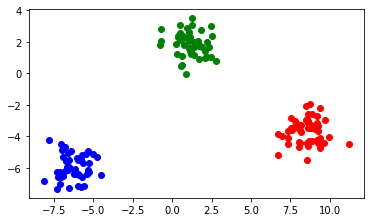

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:50, 0], X[:50, 1], color="red")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue")
plt.scatter(X[100:, 0], X[100:, 1], color="green")
plt.gca().set_aspect("equal", adjustable="box")

In [3]:
#
# Codigo de color para las clases
#
#  0: red
#  1: blue
#  2: green
#
d

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Definición del problema de clasificación

El problema de clasificación binaria (con clases $C_1$ y $C_2$ dicotómicas) se define de la siguiente manera:


* Cada patrón de entrada tiene la forma $\mathbf{x}=[+1,x_1,x_2,…,x_n ]$.


* Los parámetros del perceptrón binario son $\mathbf{w}=[w_0,w_1,…,w_n]$ tal que $y=\varphi(\mathbf{w}^T \mathbf{x})$, donde $\varphi(.)$ es un conmutador bipolar.

![assets/PerceptronBipolar.jpg](assets/PerceptronBipolar.jpg)

* Se desea encontrar el vector $\mathbf{w}$ tal que el perceptrón clasifique correctamente todos los patrones de entrenamiento.


* El error del perceptrón con parámetros $\mathbf{w}$, $E(\mathbf{w})$, es la cantidad de patrones mal clasificados.


![assets/PerceptronBipClasificacion-01.png](assets/PerceptronBipClasificacion-01.png)

## Regla de aprendizaje del perceptrón

La regla de aprendizaje del perceptrón es básicamente el algoritmo de gradiente descendente estocástico (SGD):

* $d_k$ es la respuesta deseada para el patrón $\mathbf{x}_k$ presentado en el instante $k$.


* $e_k$ es el error definido como:

$$
e_k= 
d_k-y_k = 
d_k - \varphi(\mathbf{w}^T_k \mathbf{x}_k) =
\begin{cases}      
       0,  & \text{Si $d_k = y_k$}\\
      +2, & \text{Si $d_k = +1$ y $y_k = -1$}\\
      -2, & \text{Si $d_k = -1$ y $y_k = +1$}\\
\end{cases}
$$


* Se desea calcular unos pesos corregidos $\mathbf{w}_{k+1}=\mathbf{w}_k+\Delta \mathbf{w}_k$ tal que el perceptrón no se equivoque; es decir:

$$
\varphi (\mathbf{w}^T_{k+1} \mathbf{x}_k) = \varphi ([\mathbf{w}_k + \Delta \mathbf{w}_k]^T  \mathbf{x}_k)=d_k
$$


El cálculo de los pesos se realiza de la siguiente forma. Se requiere que:


* Si $e_k=+2$, entonces $d_k=+1$,   $y_k=-1$   y   $\Delta \mathbf{w}^T_k  \mathbf{x}_k>0$ tal que:  $\varphi (\mathbf{w}^T_{k+1} \mathbf{x}_k)=+1$.


* Si $e_k=-2$, entonces $d_k=-1$, $y_k =+1$  y  $\Delta \mathbf{w}^T_k \mathbf{x}_k<0$ tal que: $\varphi (\mathbf{w}^T_ {k+1} \mathbf{x}_k)=-1$.


Entonces se podría escoger:

$$\Delta \mathbf{w}_k= \eta e_k  \mathbf{x}_k$$

$$\mathbf{w}_{k+1} = \mathbf{w}_k+\eta e_k  \mathbf{x}_k$$

donde $\eta$ es la tasa de aprendizaje. Note que la ecuación presentada es similar a la usada para el ADALINE, pero en el caso del perceptrón, $e_k \in \{-2, 0, +2\}$, tal que la convergencia genera fronteras de decisión que usualmente son muy diferentes a las del ADALINE.  

Se inicializa el vector de parámetros $\mathbf{w}_0 = [w_0,w_1,…,w_n ]^T$ con ceros, o con un valor aleatorio pequeño.

Los patrones deberían presentarse en un orden aleatorio. 



El siguiente esquema permite diferenciar entre los algoritmos de aprendizaje del perceptrón y el ADALINE.

![assets/PerceptronBipClasificacion-04.png](assets/PerceptronBipClasificacion-04.png)

## Implementación del algoritmo

In [4]:
class BipolarPerceptronClassifier:
    """
    Bipolar perceptron classifier

    Parameters
    ----------
    learning_rate : float
        Learning rate coefficient. Default to 0.1.

    max_iter : integer
        The maximun number of passes over the training dataset (aka epochs).
        Default to 100
    """

    def __init__(self, learning_rate=0.00001, max_iter=100):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.w = None

        
    def init_weights(self):
        #
        # Genera un vector de ceros para los pesos iniciales
        #
        self.intercept_ = 0.0
        self.coef_ = np.zeros(len(X[0]))
        
    def fit(self, X, y):

        self.init_weights()
        history = []
        for epoch in range(self.max_iter):            
            #
            # Recorre todos los puntos del dataset en
            # orden aleatorio
            #        
            for n in np.random.choice(len(d), len(d), replace=False):
                prediction = self.intercept_ + sum(self.coef_ * X[n])
                prediction = 1.0 if prediction >=0 else -1.0
                error = y[n] - prediction
                self.intercept_ += 2.0 * self.learning_rate * error
                self.coef_ += 2 * self.learning_rate * error * X[n]
                history.append(error ** 2)

        return history

    def predict(self, X):
        y = [self.intercept_ + sum([wi * xi   for wi, xi in zip(self.coef_, X[n])])  for n in  range(len(X))] 
        return [1 if yi >=0 else -1 for yi in y]

## Entrenamiento del modelo

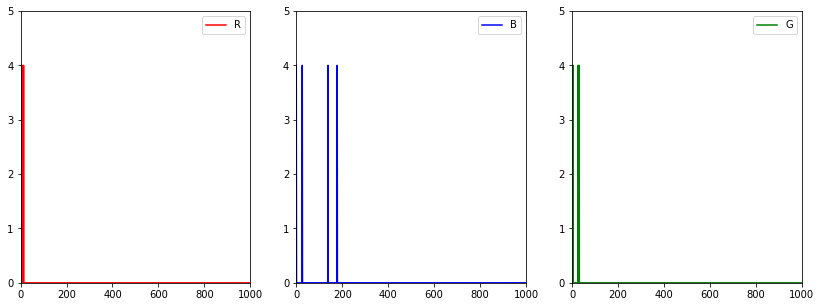

In [5]:
import numpy as np

#
# Solución
#    Se codifica un vector para cada clase
#
#    0: red
#    1: blue
#    2: green
#

R = [+1 if u == 0 else -1 for u in d]
B = [+1 if u == 1 else -1 for u in d]
G = [+1 if u == 2 else -1 for u in d]

max_iter = 1000

mR = BipolarPerceptronClassifier(learning_rate=0.001, max_iter=max_iter)
mB = BipolarPerceptronClassifier(learning_rate=0.001, max_iter=max_iter)
mG = BipolarPerceptronClassifier(learning_rate=0.001, max_iter=max_iter)

historyR = mR.fit(X, R)
historyB = mB.fit(X, B)
historyG = mG.fit(X, G)

plt.figure(figsize=(14,5))

plt.subplot(1, 3, 1)
plt.plot(historyR, c='red')
plt.legend("R")
plt.xlim(0, max_iter)
plt.ylim(0, 5)

plt.subplot(1, 3, 2)
plt.plot(historyB, c='blue')
plt.legend("B")
plt.xlim(0, max_iter)
plt.ylim(0, 5)

plt.subplot(1, 3, 3)
plt.plot(historyG, c='green')
plt.legend("G")
plt.xlim(0, max_iter)
plt.ylim(0, 5);

## Pronóstico

In [6]:
#
#  Pronostico para un punto que no pertence
#  a la muestra de datos
#
print(
    mR.predict([[2.5, -4.0]]),
    mB.predict([[2.5, -4.0]]),
    mG.predict([[2.5, -4.0]]),
)

# el punto pertence a la clase A (Rojo)

[1] [-1] [-1]


## Fronteras de decisión

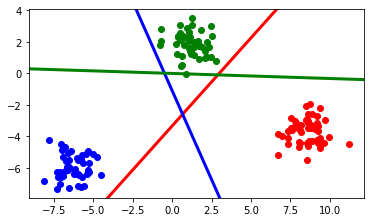

In [7]:
plt.scatter(X[:50, 0], X[:50, 1], color="red")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue")
plt.scatter(X[100:, 0], X[100:, 1], color="green")
plt.gca().set_aspect("equal", adjustable="box")

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

xplot = np.linspace(start=xlim[0], stop=xlim[1], num=20)
fronteraR = -mR.intercept_ / mR.coef_[1] - mR.coef_[0] / mR.coef_[1] * xplot
fronteraB = -mB.intercept_ / mB.coef_[1] - mB.coef_[0] / mB.coef_[1] * xplot
fronteraG = -mG.intercept_ / mG.coef_[1] - mG.coef_[0] / mG.coef_[1] * xplot

plt.plot(xplot, fronteraR, color="red", linewidth=3)
plt.plot(xplot, fronteraB, color="blue", linewidth=3)
plt.plot(xplot, fronteraG, color="green", linewidth=3)

plt.xlim(xlim)
plt.ylim(ylim);

### Variaciones al método del perceptrón

La primera variación al método del perceptrón consiste en calcular la corrección neta sobre todos los patrones (aprendizaje batch) e introducir un mecanismo de adaptación en la tasa de aprendizaje:

$$
\mathbf{w}_{k+1} = \mathbf{w}_k + \eta \sum_{p=1}^P  e_p \mathbf{x}_p
$$


La segunda variación consiste en introducir un margen $b$ al realizarse el entrenamiento del perceptrón, tal que:

$$
y_k = \varphi \left( \mathbf{w}^T_k \mathbf{x}_k-b * d_k \right)
$$

**Actividad.---** Modifique el código del ejercicio anterior para incorporar las dos variaciones indicadas simultaneamente. Para el caso de $\eta$ considere que si el error disminuye de una iteración a otra, $\eta$ aumenta; si el error aumenta, se retorna a los pesos anteriores y $\eta$ disminuye.

**Actividad.---** Grafique las fronteras de decisión para los problemas propuestos.

## Solución usando scikit-learn

In [8]:
from sklearn.linear_model import Perceptron

clf = Perceptron(
    penalty=None,             # None, 'l1', 'l2', 'elasticnet'
    alpha=0.0001,             # parametro regularizacion
    fit_intercept=True,       #
    max_iter=1000,            #
    shuffle=True,             #
    verbose=0,                #
    eta0=1.0,                 # tasa de aprendizaje
    random_state=0,           # para shuffle
    early_stopping=False,     # ?early_stopping
    validation_fraction=0.1,  # % test set en early_stopping
    n_iter_no_change=5,       # máximo de iteraciones sin cambio
    class_weight=None,        # peso de las clases
    warm_start=False,         # ?usa la solución previa como punto de arranque
)

clf.fit(X, d)
clf.score(X, d)

1.0

In [9]:
from sklearn.metrics import confusion_matrix

confusion_matrix(d, clf.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

In [10]:
#
# Parametros
#
clf.coef_

array([[ 3.60924129, -3.87946541],
       [-6.64344969, -3.02385523],
       [ 0.05183502, 11.07081134]])

In [11]:
#
# Interceptos
#
clf.intercept_

array([-15.,  -4.,   2.])

In [12]:
#
# Codigo de color para las clases
#
#  0: red
#  1: blue
#  2: green
#
clf.predict([[2.5, -4.0]])

array([0])

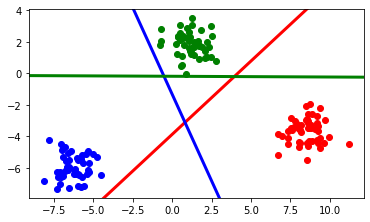

In [13]:
plt.scatter(X[:50, 0], X[:50, 1], color="red")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue")
plt.scatter(X[100:, 0], X[100:, 1], color="green")
plt.gca().set_aspect("equal", adjustable="box")

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

xplot = np.linspace(start=xlim[0], stop=xlim[1], num=20)
fronteraR = -clf.intercept_[0] / clf.coef_[0][1] - clf.coef_[0][0] / clf.coef_[0][1] * xplot
fronteraB = -clf.intercept_[1] / clf.coef_[1][1] - clf.coef_[1][0] / clf.coef_[1][1] * xplot
fronteraG = -clf.intercept_[2] / clf.coef_[2][1] - clf.coef_[2][0] / clf.coef_[2][1] * xplot

plt.plot(xplot, fronteraR, color="red", linewidth=3)
plt.plot(xplot, fronteraB, color="blue", linewidth=3)
plt.plot(xplot, fronteraG, color="green", linewidth=3)

plt.xlim(xlim)
plt.ylim(ylim);